In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

In [40]:
def load_obesity_data(file_path="../data/ObesityDataSet.csv"):
    try:
        if not Path(file_path).is_file():
            raise FileNotFoundError(f"Plik {file_path} nie istnieje")

        data = pd.read_csv(file_path)

        if data.empty:
            raise pd.errors.EmptyDataError("Plik jest pusty")

        return data

    except Exception as e:
        print(f"Błąd podczas wczytywania danych: {str(e)}")
        raise

data = load_obesity_data()

In [41]:
def calculate_and_save_statistics_separate(data, output_prefix="data_statistics"):
    numeric_stats = []
    categorical_stats = []

    for column in data.columns:
        col_data = data[column]

        if pd.api.types.is_numeric_dtype(col_data):     # cechy numeryczne
            stats = {
                'feature': column,
                'mean': col_data.mean(),
                'median': col_data.median(),
                'min': col_data.min(),
                'max': col_data.max(),
                'std': col_data.std(),
                'percentile_5': np.percentile(col_data.dropna(), 5),
                'percentile_95': np.percentile(col_data.dropna(), 95),
                'missing_values': col_data.isna().sum()
            }
            numeric_stats.append(stats)

        else:       # cechy kategoryczne
            value_counts = col_data.value_counts(normalize=True)
            stats = {
                'feature': column,
                'unique_classes': col_data.nunique(),
                'missing_values': col_data.isna().sum(),
                'most_frequent_class': value_counts.idxmax(),
                'most_frequent_proportion': value_counts.max(),
                'classes_proportions': value_counts.to_dict()
            }

            categorical_stats.append(stats)

    numeric_df = pd.DataFrame(numeric_stats)
    categorical_df = pd.DataFrame(categorical_stats)

    numeric_file = f"../data/p1/{output_prefix}_numeric.csv"
    categorical_file = f"../data/p1/{output_prefix}_categorical.csv"

    numeric_df.to_csv(numeric_file, index=False)
    categorical_df.to_csv(categorical_file, index=False)

    print(f"Statystyki numeryczne zapisane do: {numeric_file}")
    print(f"Statystyki kategorialne zapisane do: {categorical_file}")

    return numeric_df, categorical_df

calculate_and_save_statistics_separate(data)

Statystyki numeryczne zapisane do: ../data/p1/data_statistics_numeric.csv
Statystyki kategorialne zapisane do: ../data/p1/data_statistics_categorical.csv


(  feature       mean     median    min     max        std  percentile_5  \
 0     Age  24.312600  22.777890  14.00   61.00   6.345968     17.891428   
 1  Height   1.701677   1.700499   1.45    1.98   0.093305      1.548291   
 2  Weight  86.586058  83.000000  39.00  173.00  26.191172     48.500000   
 3    FCVC   2.419043   2.385502   1.00    3.00   0.533927      1.523214   
 4     NCP   2.685628   3.000000   1.00    4.00   0.778039      1.000000   
 5    CH2O   2.008011   2.000000   1.00    3.00   0.612953      1.000000   
 6     FAF   1.010298   1.000000   0.00    3.00   0.850592      0.000000   
 7     TUE   0.657866   0.625350   0.00    2.00   0.608927      0.000000   
 
    percentile_95  missing_values  
 0      38.098070               0  
 1       1.850000               0  
 2     131.916152               0  
 3       3.000000               0  
 4       3.750881               0  
 5       3.000000               0  
 6       2.677133               0  
 7       2.000000         

In [42]:
def box_plot(data):
    plt.figure(figsize=(16, 8))
    sns.boxplot(
        x='NObeyesdad',
        y='FAF',
        hue='Gender',
        data=data,
        order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
               'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
        palette={'Female': '#ff6b9d', 'Male': '#5b9bd5'},  # Kolory dla płci
        showmeans=True,
        meanprops={'marker': 'D', 'markerfacecolor': 'black', 'markersize': 8},
        linewidth=1.5,
        width=0.7,
        fliersize=5
    )

    plt.title('Aktywność fizyczna wg poziomu otyłości z podziałem na płeć', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Poziom otyłości', fontsize=14, labelpad=10)
    plt.ylabel('Stopień aktywności fizycznej', fontsize=14, labelpad=10)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.yticks(fontsize=12)

    legend = plt.legend(
        title='Płeć',
        title_fontsize=13,
        fontsize=12,
        framealpha=0.9,
        shadow=True,
        borderpad=1
    )
    legend.get_frame().set_facecolor('#f5f5f5')

    plt.grid(axis='y', linestyle=':', alpha=0.4, color='gray')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig(fname='../data/p1/box_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

def violin_plot(data):
    plt.figure(figsize=(14, 7))
    sns.violinplot(
        x='NObeyesdad',
        y='FCVC',
        hue='FAVC',
        data=data,
        order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
               'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
        split=True,
        inner='box',
        palette={'yes': '#8c564b', 'no': '#17becf'},
        density_norm='width'
    )

    plt.title('Spożycie warzyw wg poziomu otyłości z podziałem na wysokokaloryczną dietę', fontsize=16, pad=20,
              fontweight='bold')
    plt.xlabel('Poziom otyłości', fontsize=14, labelpad=10)
    plt.ylabel('Częstotliwość spożycia warzyw', fontsize=14, labelpad=10)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.yticks(fontsize=12)

    legend = plt.legend(
        title='Wysokokaloryczna dieta?',
        title_fontsize=13,
        fontsize=12,
        framealpha=0.9,
        shadow=True,
        borderpad=1,
        bbox_to_anchor=(0.90, 0.6),
    )
    legend.get_frame().set_facecolor('#f5f5f5')

    plt.grid(axis='y', linestyle=':', alpha=0.4, color='gray')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig(fname='../data/p1/violin_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

def error_bars(data):
    plt.figure(figsize=(14, 7))

    age_bins = [10, 20, 25, 30, 35, 40, 50, 65]
    age_labels = ['10-20', '21-25', '26-30', '31-35', '36-40', '41-50', '51-65']
    data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

    sns.pointplot(
        x='Age_Group',
        y='Weight',
        hue='family_history_with_overweight',
        data=data,
        palette={'yes': '#e377c2', 'no': '#9467bd'},
        estimator=np.mean,
        errorbar=('ci', 95),
        capsize=0.1,
        markers=['o', 's'],
        linestyles=['-', '--'],
        err_kws={'linewidth': 1.5}
    )

    plt.title('Średnia waga wg wieku', fontsize=14, pad=20)
    plt.xlabel('Przedział wiekowy (lata)', fontsize=12)
    plt.ylabel('Waga (kg)', fontsize=12)
    plt.legend(title='Otyłość w rodzinie?', bbox_to_anchor=(1.02, 1))
    sns.despine()
    plt.tight_layout()
    plt.savefig(fname='../data/p1/error_bars.png', dpi=300, bbox_inches='tight')
    plt.show()

def hist_plot(data):
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=data,
        x='CH2O',
        bins=12,
        color='#04a777',
        alpha=0.7,
        edgecolor='#333333',
        linewidth=1,
        stat='percent'
    )

    # Zaznaczenie rekomendowanego spożycia wody
    plt.axvspan(1.5, 2.5, color='#0496ff', alpha=0.2, label='Zalecany zakres')

    plt.title('Ilość wypijanej wody', fontsize=14, pad=15)
    plt.xlabel('Litry wody dziennie', fontsize=12)
    plt.ylabel('Procent osób', fontsize=12)
    plt.legend()
    sns.despine(left=True)
    plt.grid(axis='y', linestyle=':', alpha=0.4)
    plt.savefig(fname='../data/p1/hist_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

def hist_plot_hue(data):
    plt.figure(figsize=(14, 7))

    sns.histplot(
        data=data,
        x='Age',
        hue='Gender',
        bins=35,  # Liczba słupków
        kde=True,  # Dodanie wygładzonej krzywej
        palette={'Female': '#5b9bd5', 'Male': '#e75480'},
        edgecolor='white',
        linewidth=0.5,
        alpha=0.7,
        multiple='dodge',
        shrink=0.8

    )

    plt.title('Liczba badanych osób w danym wieku z podziałem na płeć', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Wiek (lata)', fontsize=14)
    plt.ylabel('Liczba osób', fontsize=14)
    plt.xticks(np.arange(data['Age'].min() + 1, data['Age'].max() + 1, 5), fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend(
        title='Płeć',
        labels=['Kobieta', 'Mężczyzna'],
        fontsize=12,
        title_fontsize=13,
        frameon=True,
        shadow=True
    )

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    sns.despine()
    plt.tight_layout()
    plt.savefig(fname='../data/p1/hist_plot_hue.png', dpi=300, bbox_inches='tight')
    plt.show()

def heat_map(data):
    # macierz korelacji
    corr_matrix = data.select_dtypes(include=['number']).corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        vmin=-1, vmax=1,
        linewidths=0.5,
        square=True
    )
    plt.title('Macierz korelacji cech numerycznych', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(fname='../data/p1/heat_map.png', dpi=300, bbox_inches='tight')
    plt.show()

def reg_plot(data):
    plt.figure(figsize=(12, 8))

    # Warstwa linii regresji (bez punktów)
    ax = sns.regplot(
        data=data,
        x='Age',
        y='Weight',
        scatter=False,  # Wyłącz punkty
        ci=95,
        line_kws={
            'color': '#e74c3c',
            'linewidth': 2,
            'label': 'Linia regresji'
        },
        ax=plt.gca()
    )

    # Warstwa punktów z kolorowaniem według płci
    sns.scatterplot(
        data=data,
        x='Age',
        y='Weight',
        hue='Gender',
        palette={'Male': '#5b9bd5', 'Female': '#ff6b9d'},
        alpha=0.6,
        s=80,
        edgecolor='w',
        linewidth=0.5,
        ax=plt.gca()
    )

    slope, intercept, r_value, p_value, _ = stats.linregress(data['Age'], data['Weight'])

    # informacje statystyczne
    stats_text = (
        f"Współczynnik korelacji (r) = {r_value:.2f}\n"
        f"Współczynnik determinacji (R²) = {r_value ** 2:.2f}\n"
        f"Równanie: Weight = {slope:.2f}·Age + {intercept:.2f}"
    )

    plt.text(
        0.68, 0.97,
        stats_text,
        transform=ax.transAxes,
        verticalalignment='top',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round')
    )

    # Zaznaczenie średnich wartości
    mean_age = data['Age'].mean()
    mean_weight = data['Weight'].mean()
    ax.axvline(mean_age, color='#2c3e50', linestyle='--', alpha=0.7, label=f'Średni wiek ({mean_age:.1f} lat)')
    ax.axhline(mean_weight, color='#2c3e50', linestyle=':', alpha=0.7, label=f'Średnia waga ({mean_weight:.1f} kg)')

    plt.title('Korelacja liniowa: Wiek vs Waga', fontsize=16, pad=20)
    plt.xlabel('Wiek (lata)', fontsize=14)
    plt.ylabel('Waga (kg)', fontsize=14)
    plt.legend(loc='upper center', fontsize=12)
    plt.grid(alpha=0.2)
    sns.despine()
    plt.tight_layout()
    plt.savefig(fname='../data/p1/reg_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

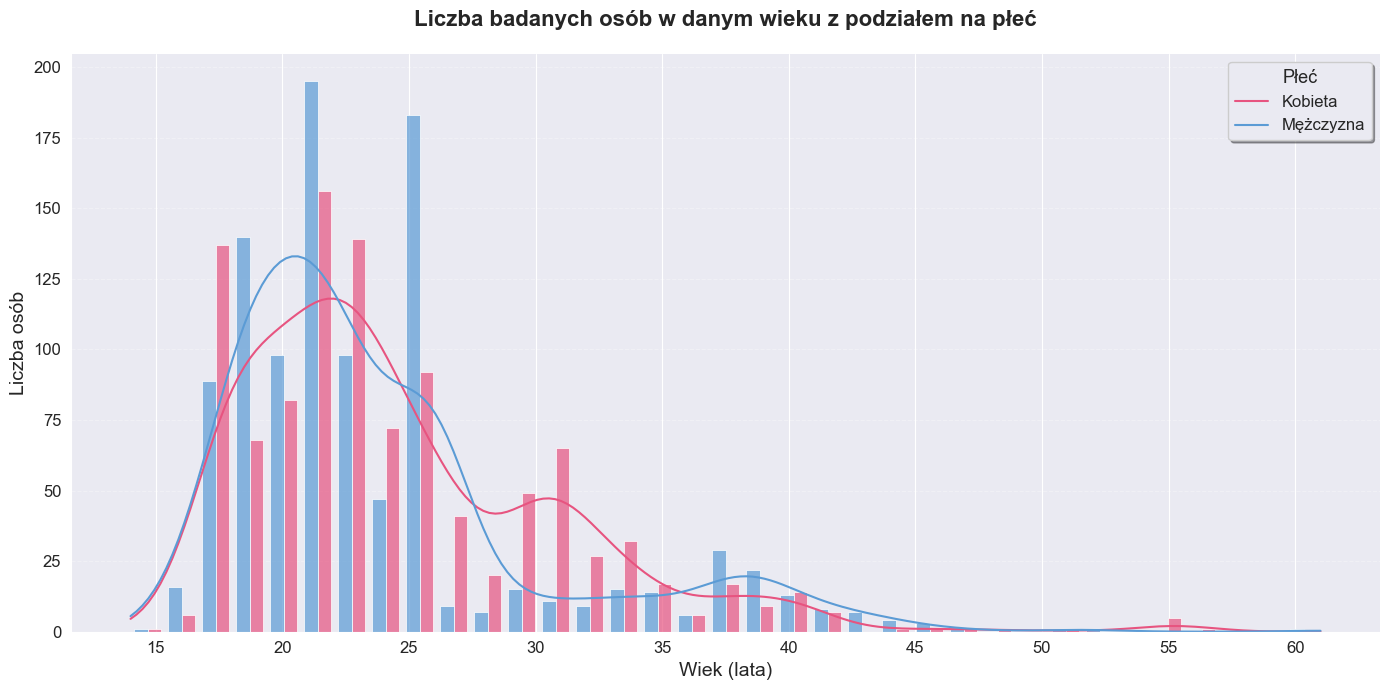

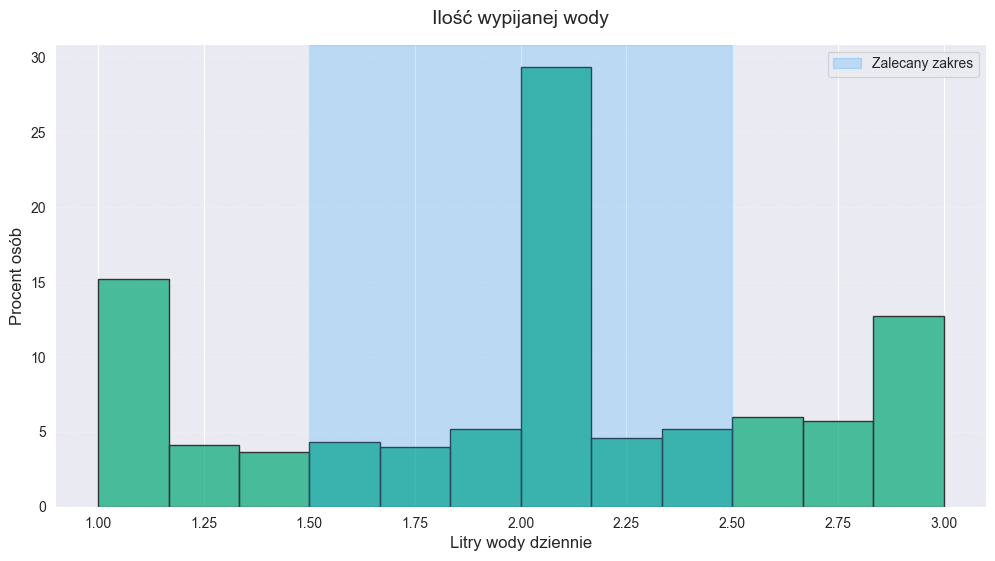

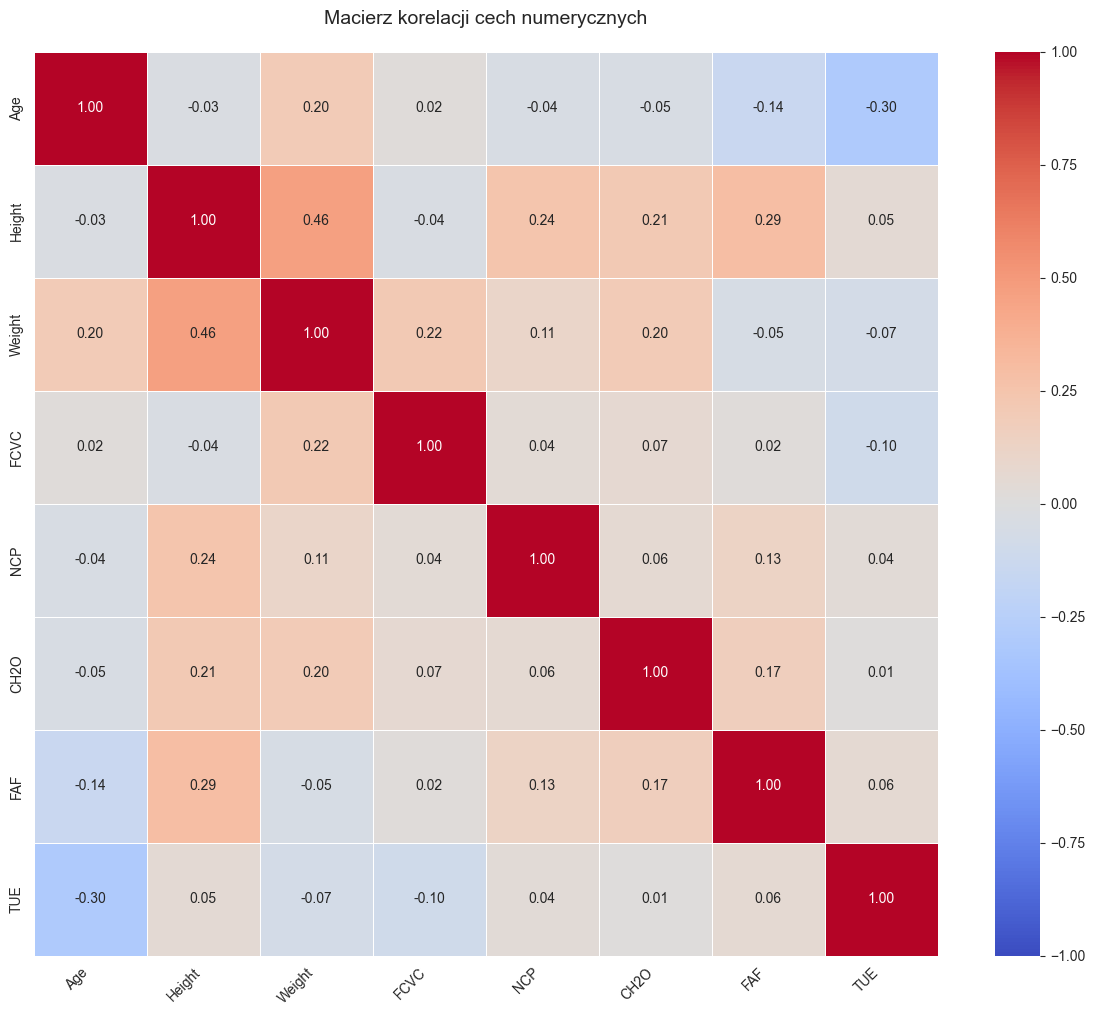

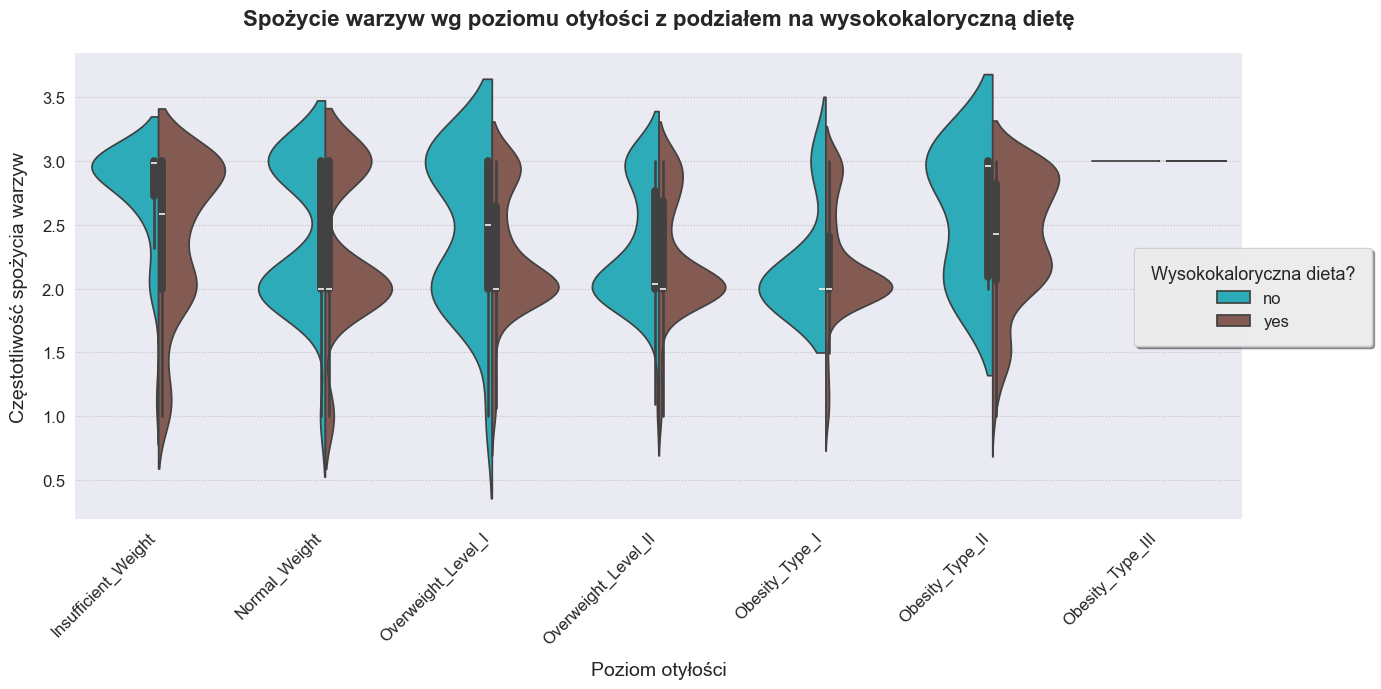

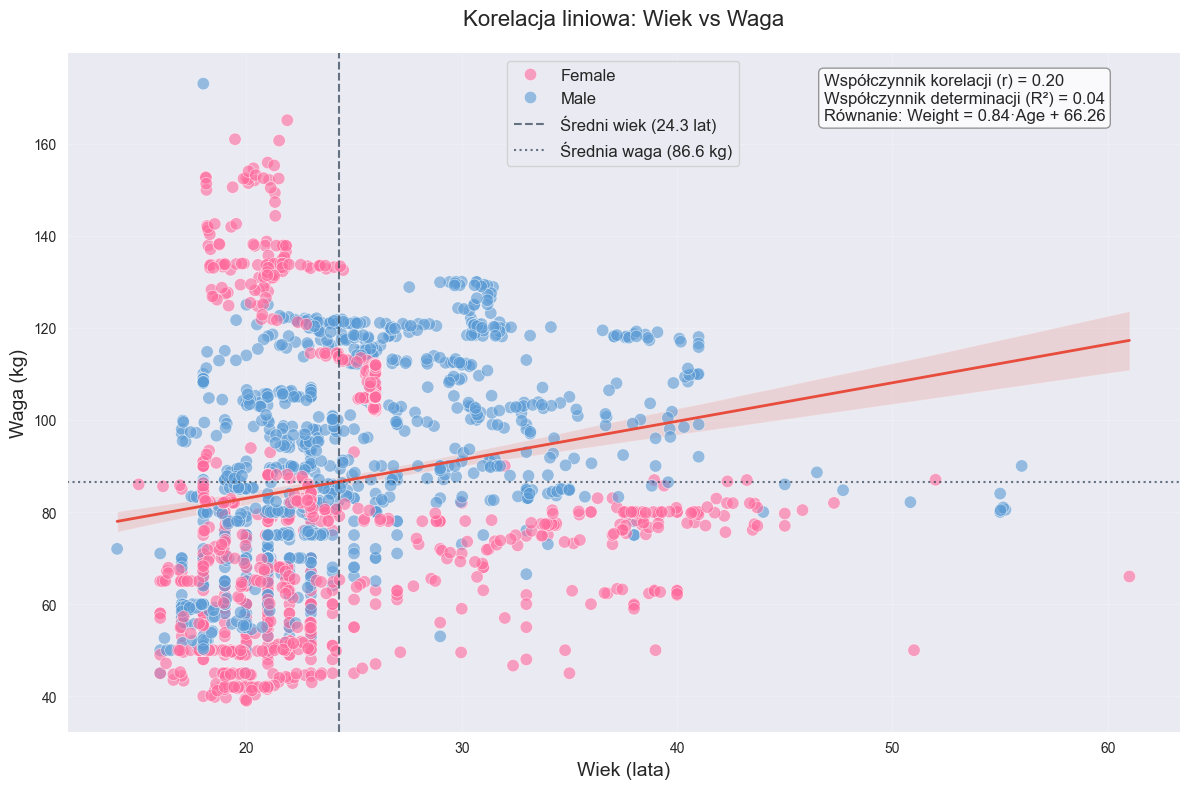

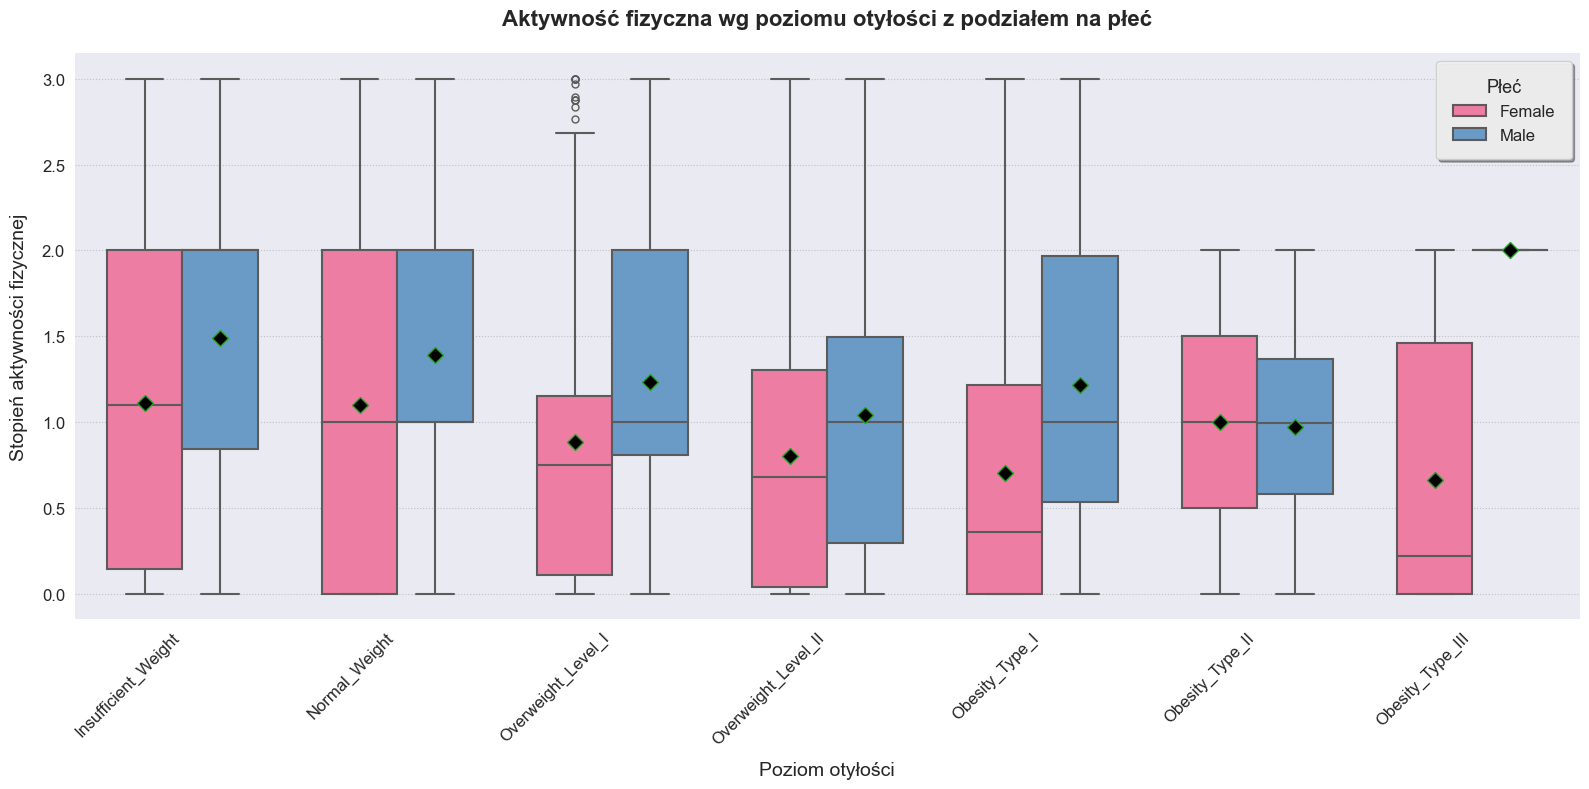

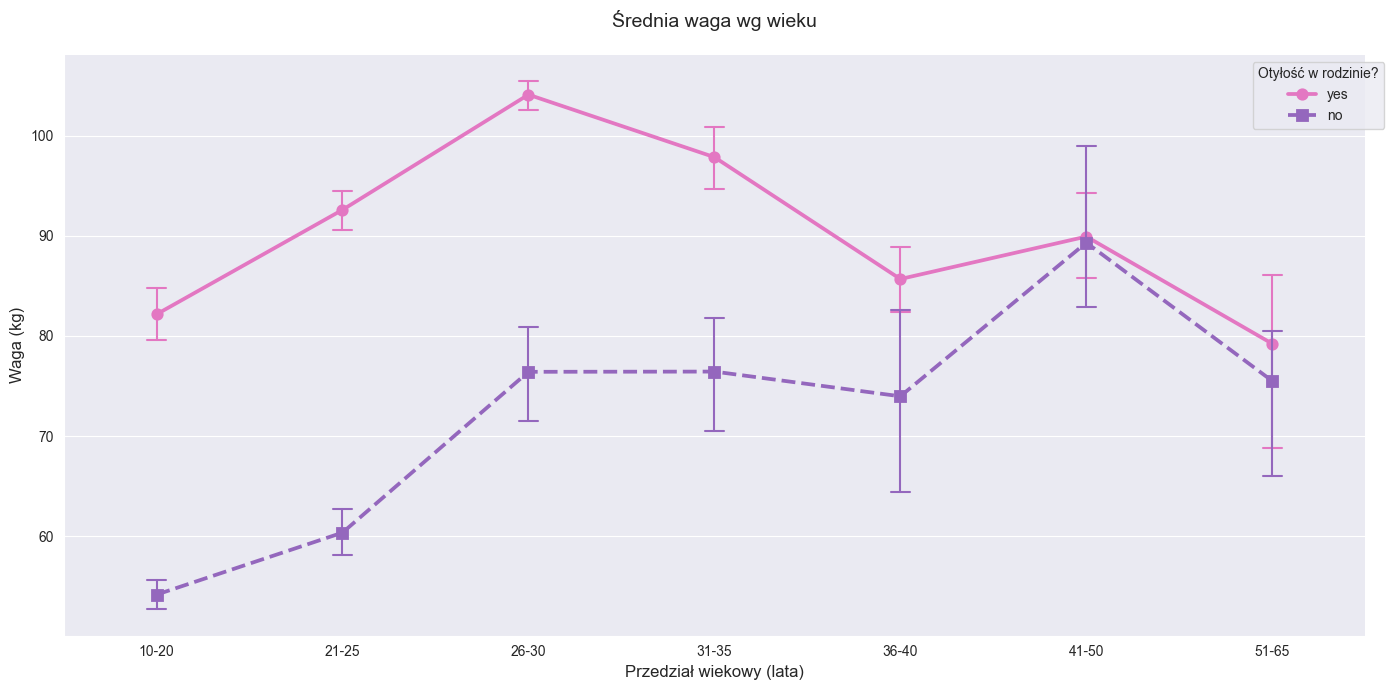

In [43]:
hist_plot_hue(data)
hist_plot(data)
heat_map(data)
violin_plot(data)
reg_plot(data)
box_plot(data)
error_bars(data)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------